<a href="https://colab.research.google.com/github/Garimasingh1283/2024Gr17EC431/blob/main/Ec431.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Simulating the dataset
np.random.seed(42)
data = {
    'Radio_type': np.random.choice([1, 2], 1000),  # 1=4G, 2=5G
    'Throughput': np.random.uniform(0, 954, 1000),
    'Distance': np.random.uniform(25, 160, 1000),
    'Orientation': np.random.uniform(0, 90, 1000),
    'NLOS_with_multipath': np.random.choice([1, 2], 1000),
    'NLOS_without_multipath': np.random.choice([1, 2], 1000),
    'Server': np.random.choice([1, 2], 1000),  # 1=CDN, 2=SWS
    'Web_protocol': np.random.choice([1, 2], 1000),  # 1=HTTP, 2=HTTPS
    'Download_time': np.random.uniform(39, 56, 1000)
}
df = pd.DataFrame(data)



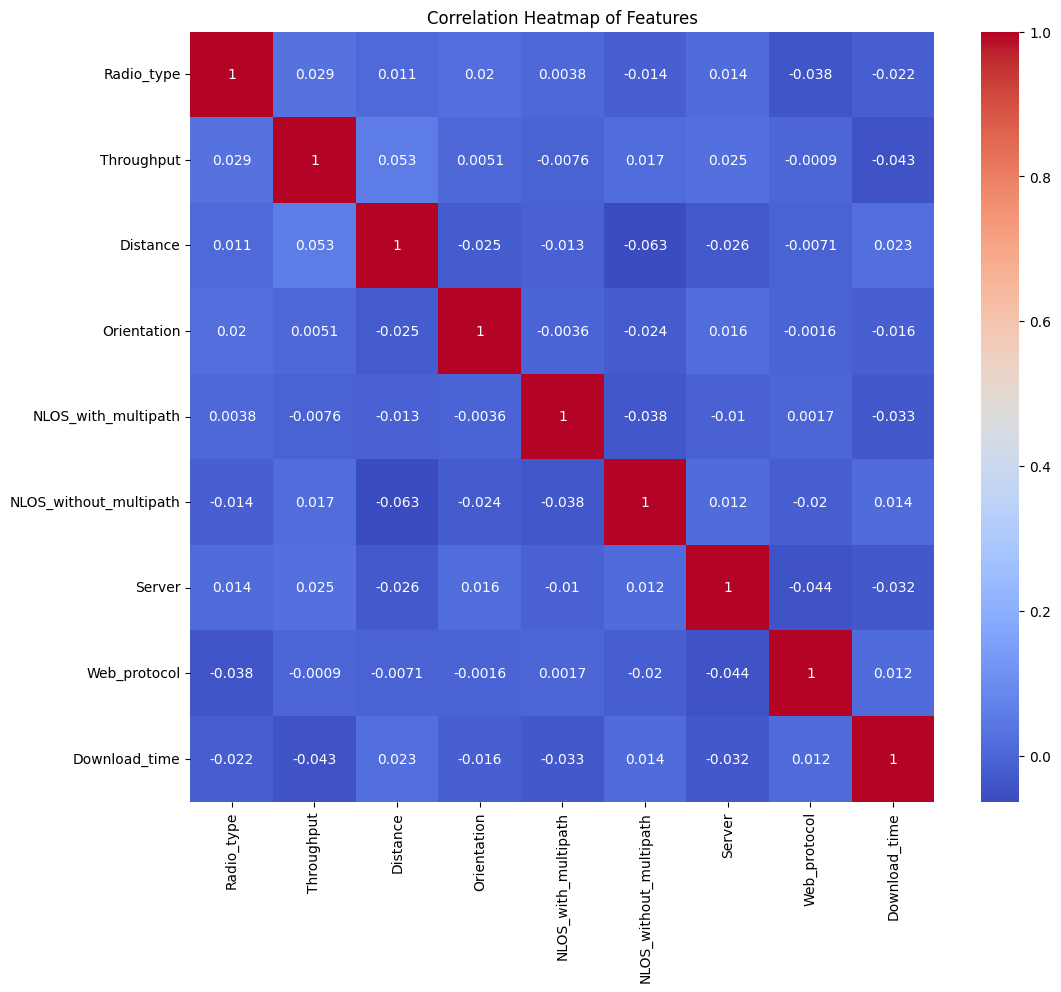

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


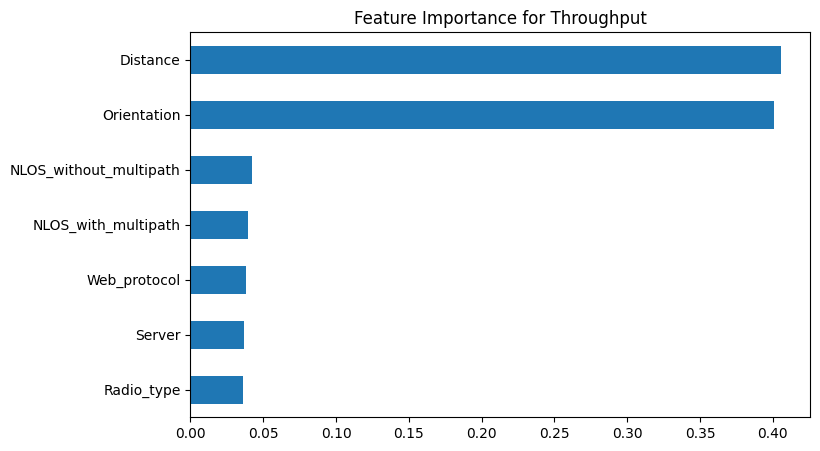

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Throughput', 'Download_time'])
y = df['Throughput']
rf = RandomForestRegressor()
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5), title='Feature Importance for Throughput')
plt.show()


In [ ]:
import statsmodels.api as sm

X2 = sm.add_constant(df[['Distance', 'Orientation', 'NLOS_with_multipath', 'NLOS_without_multipath', 'Radio_type']])
model = sm.OLS(df['Throughput'], X2).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Throughput   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8333
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.526
Time:                        14:15:53   Log-Likelihood:                -7045.3
No. Observations:                1000   AIC:                         1.410e+04
Df Residuals:                     994   BIC:                         1.413e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    400